In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import igraph as ig
import networkx as nx
import leidenalg as la
from operator import itemgetter
path_files = "C:/Users/gianl/Desktop/Gi/Supsi/MartaLauraGiada/Laura/Files/"

In [2]:
rt = pd.read_csv(path_files + "user_rtuser_3.csv")
user = pd.read_csv(path_files + "names_3.csv")

In [4]:
merge = rt.merge(user, left_on="From", right_on="Label")
merge = merge.merge(user, left_on="To", right_on="Label")
comm_bad = merge[(merge["Community_x"]==0) & (merge["Community_y"]==0)]
comm_bad

,Source,Target,From,To,Id_x,Label_x,Community_x,Id_y,Label_y,Community_y
0,883,13668,planetpaul65,isentinelli,883,planetpaul65,0,13668,isentinelli,0
1,9606,13668,pvsassone,isentinelli,9606,pvsassone,0,13668,isentinelli,0
2,29440,13668,SerenettaMonti,isentinelli,29440,SerenettaMonti,0,13668,isentinelli,0
3,6576,13668,vicinolontano,isentinelli,6576,vicinolontano,0,13668,isentinelli,0
5,27076,13668,Moixus1970,isentinelli,27076,Moixus1970,0,13668,isentinelli,0
...,...,...,...,...,...,...,...,...,...,...
1910977,26730,4084,TendenzaPerche,biascoleonardo,26730,TendenzaPerche,0,4084,biascoleonardo,0
1910979,1023,26409,HeyGoogle85,bellodari0,1023,HeyGoogle85,0,26409,bellodari0,0
1910986,10031,9774,robymes,_geniodelmale,10031,robymes,0,9774,_geniodelmale,0
1910993,15090,26135,PossibileSard,Carmen36852700,15090,PossibileSard,0,26135,Carmen36852700,0


In [8]:
lst = list(comm_bad["From"])
lst.extend(list(comm_bad["To"]))
lst = list(set(lst))
df = pd.DataFrame(lst, columns=["Name"])
df

,Name
0,pnavetta
1,Salvo332Salvo
2,profondo
3,avv_gr
4,SMMgirl
...,...
9514,evelina21478
9515,Enzo40510601
9516,pierpa964
9517,GSalsiccia


In [5]:
retweets_graph = nx.from_pandas_edgelist(comm_bad,'From','To', create_using=nx.DiGraph())
print(nx.info(retweets_graph))

DiGraph with 11155 nodes and 262923 edges


In [6]:
degree_dict = dict(retweets_graph.degree(retweets_graph.nodes()))
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
in_degree_dict = dict(retweets_graph.in_degree(retweets_graph.nodes()))
sorted_in_degree = sorted(in_degree_dict.items(), key=itemgetter(1), reverse=True)
out_degree_dict = dict(retweets_graph.out_degree(retweets_graph.nodes()))
sorted_out_degree = sorted(out_degree_dict.items(), key=itemgetter(1), reverse=True)

In [49]:
sorted_degree

[('RobertoBurioni', 5994),
 ('CottarelliCPI', 2997),
 ('lucianocapone', 2911),
 ('Cartabellotta', 2569),
 ('jacopo_iacoboni', 2348),
 ('GiacomoGorini', 2152),
 ('carloalberto', 1743),
 ('davcarretta', 1660),
 ('riotta', 1622),
 ('matteorenzi', 1542),
 ('udogumpel', 1530),
 ('antonellaviol17', 1476),
 ('Quirinale', 1438),
 ('claudiocerasa', 1437),
 ('AngeloBraga2', 1427),
 ('ricpuglisi', 1316),
 ('OGiannino', 1313),
 ('CarloCalenda', 1294),
 ('Iperbole_', 1222),
 ('GassmanGassmann', 1201),
 ('GiovaQuez', 1177),
 ('chetempochefa', 1176),
 ('ardigiorgio', 1171),
 ('pfmajorino', 1165),
 ('lorepregliasco', 1163),
 ('MedBunker', 1158),
 ('MMmarco0', 1149),
 ('Miti_Vigliero', 1146),
 ('La_manina__', 1140),
 ('robersperanza', 1133),
 ('giorgio_gori', 1124),
 ('gloquenzi', 1111),
 ('danieledv79', 1076),
 ('Ruffino_Lorenzo', 1071),
 ('vitalbaa', 1067),
 ('PierluigiBattis', 1064),
 ('manginobrioches', 1063),
 ('CalaminiciM', 1049),
 ('ilruttosovrano', 1049),
 ('AndreaGiuricin', 1034),
 ('Marco_dr

In [7]:
retweet_df = comm_bad[["From", "To"]]
tuples = [tuple(x) for x in retweet_df.values]
retweets_graph = ig.Graph.TupleList(tuples, directed = True)
n_vertices = retweets_graph.vcount()
print("Number of vertices:", n_vertices)
print("Number of edges:", retweets_graph.ecount())
print("Density of the graph:", 2*retweets_graph.ecount()/(retweets_graph.vcount()*(retweets_graph.vcount()-1)))
total_degree=0
total_indegree = 0
total_outdegree = 0
for n in range(n_vertices):
    total_degree += retweets_graph.degree(n)
    total_indegree += retweets_graph.indegree(n)
    total_outdegree += retweets_graph.outdegree(n)
print("Average indegree:", total_indegree/n_vertices)
print("Average outdegree:", total_outdegree/n_vertices)
partition = la.find_partition(retweets_graph, la.ModularityVertexPartition)
zip_iterator = zip(retweets_graph.vs()["name"], partition.membership)
best_part = dict(zip_iterator)

Number of vertices: 11155
Number of edges: 478644
Density of the graph: 0.007693826705653068
Average indegree: 42.90847153742716
Average outdegree: 42.90847153742716


In [39]:
lst_user = []
lst_comm = []
for i in best_part:
    lst_user.append(i)
    lst_comm.append(best_part[i])
leiden = pd.DataFrame(list(zip(lst_user, lst_comm)), columns=["user", "community"])

Le prime 10 community contengono il 99.96% degli utenti


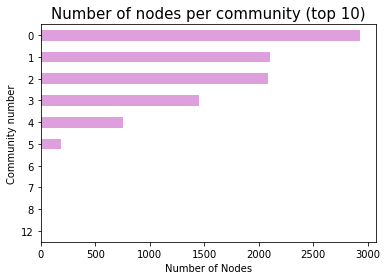

In [14]:
val = pd.Series(leiden["community"]).value_counts().sort_values(ascending=False)
total = 0
for i in val[:10]:
    total = total + i
print(f"Le prime 10 community contengono il {round(total/len(leiden)*100,2)}% degli utenti")
fig = plt.figure() #figsize=(14, 8)
ax = val[:10].plot(kind='barh', color='plum', fig=(14,14)) #orange #lightseagreen
ax.set_title('Number of nodes per community (top 10)', fontsize=15)
ax.invert_yaxis()
ax.set_ylabel("Community number")
ax.set_xlabel("Number of Nodes")
plt.show()

In [15]:
comm_0 = list(leiden[leiden["community"]==0]["user"])
comm_1 = list(leiden[leiden["community"]==1]["user"])
comm_2 = list(leiden[leiden["community"]==2]["user"])
comm_3 = list(leiden[leiden["community"]==3]["user"])
comm_4 = list(leiden[leiden["community"]==4]["user"])
comm_5 = list(leiden[leiden["community"]==5]["user"])
cont = 0
value = 15

print("Community 0:")
for item in sorted_degree:
    if cont == value:
        break
    if item[0] in comm_0:
        print(item)
        cont = cont + 1
cont = 0
print("-----------")
print("Community 1:")
for item in sorted_degree:
    if cont == value:
        break
    if item[0] in comm_1:
        print(item)
        cont = cont + 1
cont = 0
print("-----------")
print("Community 2:")
for item in sorted_degree:
    if cont == value:
        break
    if item[0] in comm_2:
        print(item)
        cont = cont + 1
cont = 0
print("-----------")
print("Community 3:")
for item in sorted_degree:
    if cont == value:
        break
    if item[0] in comm_3:
        print(item)
        cont = cont + 1
cont = 0
print("-----------")
print("Community 4:")
for item in sorted_degree:
    if cont == value:
        break
    if item[0] in comm_4:
        print(item)
        cont = cont + 1

Community 0:
('pbecchi', 3437)
('intuslegens', 3334)
('ladyonorato', 3058)
('borghi_claudio', 2783)
('TarroGiulio', 2384)
('fdragoni', 2359)
('francescatotolo', 2165)
('LaVeritaWeb', 1999)
('barbarab1974', 1971)
('mgmaglie', 1687)
('NicolaPorro', 1630)
('Gianmar26145917', 1618)
('Libero_official', 1598)
('matteosalvinimi', 1519)
('GiancarloDeRisi', 1513)
-----------
Community 1:
('noitre32', 3246)
('FmMosca', 2426)
('25O319', 2261)
('sabrimaggioni', 1885)
('andiamoviaora', 1869)
('EliseiNicole', 1824)
('doluccia16', 1783)
('Bluefidel47', 1751)
('sabrina__sf', 1750)
('gustinicchi', 1748)
('Pietro_Otto', 1671)
('liliaragnar', 1616)
('GioChirilly', 1579)
('d_essere', 1527)
('Leonard13___', 1519)
-----------
Community 2:
('valy_s', 3990)
('cris_cersei', 2776)
('lameduck1960', 2194)
('MinutemanItaly', 2124)
('Yi_Benevolence', 1969)
('Ilconservator', 1668)
('lucabattanta', 1619)
('AStramezzi', 1568)
('gzibordi', 1546)
('antonio_bordin', 1431)
('Gigadesires', 1339)
('molumbe', 1303)
('Alessan

In [40]:
lst = [i for i in range(len(leiden))]
leiden["Id"] = lst
leiden.rename(columns={'user': 'Label', 'community': 'Community'}, inplace=True)

In [41]:
leiden = leiden.merge(user, on="Label", how="left")
leiden = leiden[["Id_y", "Label", "Community_x"]]
leiden.rename(columns={'Community_x': 'Community', 'Id_y': 'Id'}, inplace=True)
# leiden = leiden[["Id", "Label", "Community"]]
leiden

,Id,Label,Community
0,21376,MinervaMcGrani1,3
1,19927,riktroiani,0
2,25629,swan92678832,3
3,1843,atestaltasempre,3
4,87,suitetti,0
...,...,...,...
9514,239,RinascimentoI,5
9515,5873,maurorotelli,0
9516,7965,LabParlamento,0
9517,24252,INFORMALTV1,4


In [22]:
comm_bad

,Source,Target,From,To,Id_x,Label_x,Community_x,Id_y,Label_y,Community_y
205419,21376,19927,MinervaMcGrani1,riktroiani,21376,MinervaMcGrani1,2,19927,riktroiani,2
205420,25629,19927,swan92678832,riktroiani,25629,swan92678832,2,19927,riktroiani,2
205421,1843,19927,atestaltasempre,riktroiani,1843,atestaltasempre,2,19927,riktroiani,2
205422,1843,19927,atestaltasempre,riktroiani,1843,atestaltasempre,2,19927,riktroiani,2
205423,1843,19927,atestaltasempre,riktroiani,1843,atestaltasempre,2,19927,riktroiani,2
...,...,...,...,...,...,...,...,...,...,...
1911015,10729,10729,Liliana91183545,Liliana91183545,10729,Liliana91183545,2,10729,Liliana91183545,2
1911016,10729,10729,Liliana91183545,Liliana91183545,10729,Liliana91183545,2,10729,Liliana91183545,2
1911017,10729,10729,Liliana91183545,Liliana91183545,10729,Liliana91183545,2,10729,Liliana91183545,2
1911018,10729,4248,Liliana91183545,CarloKapp,10729,Liliana91183545,2,4248,CarloKapp,2


In [42]:
leiden.to_csv(path_files+"users_subnet.csv",
              line_terminator="\n",
              encoding="utf-8",
              index=False)

In [17]:
comm_bad[["Source", "Target", "From", "To"]].to_csv(path_files+"leiden_subnet.csv",
                                                   line_terminator="\n",
                                                   encoding="utf-8",
                                                   index=False)